# Anomaly Detection Exercises

In [48]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings = 'ignore'

In [49]:
df = pd.read_csv('lemonade.csv')

In [50]:
df['Date'] = df['Date'].astype('datetime64')

In [51]:
df = df.set_index('Date')

In [101]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [52]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


Text(0.5, 1.0, 'Daily Temperature')

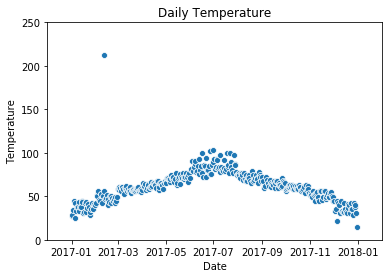

In [53]:
ax = sns.scatterplot(x=df.index,y='Temperature', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,250))
ax.set_title("Daily Temperature")

Text(0.5, 1.0, 'Daily Rainfall')

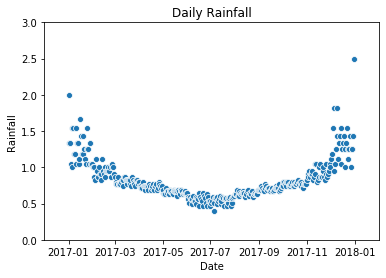

In [54]:
ax = sns.scatterplot(x=df.index,y='Rainfall', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,3))
ax.set_title("Daily Rainfall")

Text(0.5, 1.0, 'Daily Flyers')

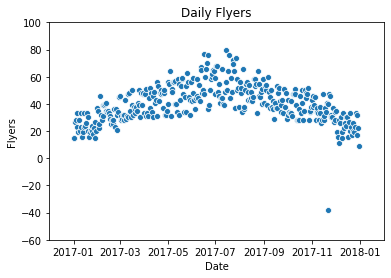

In [55]:
ax = sns.scatterplot(x=df.index,y='Flyers', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(-60,100))
ax.set_title("Daily Flyers")

Text(0.5, 1.0, 'Daily Price')

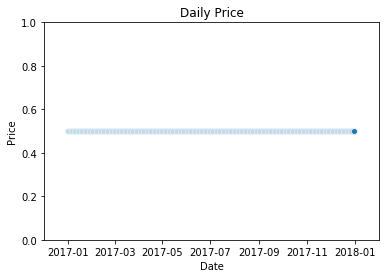

In [56]:
ax = sns.scatterplot(x=df.index,y='Price', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,1))
ax.set_title("Daily Price")

Text(0.5, 1.0, 'Daily Sales')

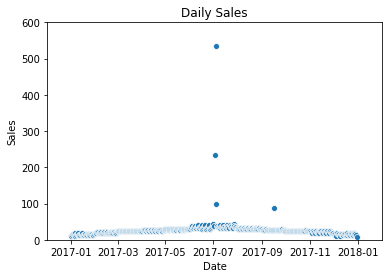

In [104]:
ax = sns.scatterplot(x=df.index,y='Sales', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,600))
ax.set_title("Daily Sales")

### 1.) Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [58]:
def get_lower_and_upper_bounds(df, ratio = 1.5):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_limit = pd.DataFrame(q1 - (ratio*iqr))
    upper_limit = pd.DataFrame(q3 + (ratio*iqr))
    results = lower_limit
    results.rename(columns={0:'lower_limit'}, inplace=True)
    results = pd.concat([lower_limit, upper_limit], axis=1)
    results.rename(columns={0:'upper_limit'}, inplace=True)
    return results

### 2.) Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [59]:
get_lower_and_upper_bounds(df)

,lower_limit,upper_limit
Temperature,16.70,104.7
Rainfall,0.26,1.3
Flyers,4.00,76.0
Price,0.50,0.5
Sales,5.00,45.0


In [60]:
lower_temp = 16.70
lower_rainfall = 0.26
lower_flyers = 4
lower_price = .5
lower_sales = 5

In [61]:
df.loc[df['Temperature'] <= lower_temp]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7


#### This is an unusually cold day, but not impossible. This outlier should be kept.

In [62]:
df.loc[df['Rainfall'] <= lower_rainfall]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


#### No lower outliers for rainfall

In [63]:
df.loc[df['Flyers'] <= lower_flyers]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


#### Negative flyers is impossible. This is likely a human input error. This outlier should be removed.

In [64]:
df.loc[df['Price'] <= lower_price]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-08,Sunday,37.5,1.18,28,0.5,15
2017-01-09,Monday,38.1,1.18,20,0.5,17


#### Our function is treating all values as outliers becuase price remains constant. All values should be kept. 

In [65]:
df.loc[df['Sales'] <= lower_sales]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


#### No lower outliers for sales

### 3.) Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [66]:
upper_temp = 104.7
upper_rainfall = 1.3
upper_flyers = 76
upper_price = .5
upper_sales = 45

In [67]:
df.loc[df['Temperature'] >= upper_temp]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21


#### This temperature is impossible and this outlier should be removed

In [68]:
df.loc[df['Rainfall'] >= upper_rainfall]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-11,Wednesday,32.6,1.54,23,0.5,12
2017-01-12,Thursday,38.2,1.33,16,0.5,14
2017-01-13,Friday,37.5,1.33,19,0.5,15
2017-01-16,Monday,30.6,1.67,24,0.5,12


#### These outliers signify very rainy days. They should be kept. 

In [69]:
df.loc[df['Flyers'] >= upper_flyers]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-21,Wednesday,94.3,0.47,76,0.5,41
2017-07-14,Friday,92.0,0.50,80,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41


#### These outliers represent days in which a lot of flyers were handed out. They occur in summer which we would expect. Keep these outliers.

In [70]:
df.loc[df['Price'] >= upper_price]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-08,Sunday,37.5,1.18,28,0.5,15
2017-01-09,Monday,38.1,1.18,20,0.5,17


#### Again, our function is treating all price values as outliers because it remains constant. Keep the outliers.

In [71]:
df.loc[df['Sales'] >= upper_sales]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534
2017-07-05,Wednesday,93.0,0.40,55,0.5,99
2017-09-16,Saturday,68.1,0.69,37,0.5,87


#### These four days are unusually high sales. The are not necessarily impossible. Keep all outliers.

## 4.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [72]:
get_lower_and_upper_bounds(df,3)

,lower_limit,upper_limit
Temperature,-16.30,137.70
Rainfall,-0.13,1.69
Flyers,-23.00,103.00
Price,0.50,0.50
Sales,-10.00,60.00


In [73]:
lower_temp = -16.70
lower_rainfall = -0.13
lower_flyers = -23
lower_price = .5
lower_sales = -10

#### None of these lower bounds make sense. Negative values do not make sense for our data. Remove any negative outliers. The sales lower bound also does not make sense. Sales price is constant. Do not remove any sales outliers. 

In [74]:
df.loc[df['Temperature'] <= lower_temp]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [75]:
df.loc[df['Rainfall'] <= lower_rainfall]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [76]:
df.loc[df['Flyers'] <= lower_flyers]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


#### Remove this outlier. Negative flyers does not make any sense. 

In [77]:
df.loc[df['Price'] <= lower_price]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-08,Sunday,37.5,1.18,28,0.5,15
2017-01-09,Monday,38.1,1.18,20,0.5,17


In [78]:
df.loc[df['Sales'] <= lower_sales]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


## 5.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [79]:
upper_temp = 137.70
upper_rainfall = 1.69
upper_flyers = 103
upper_price = .5
upper_sales = 60

In [80]:
df.loc[df['Temperature'] >= upper_temp]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21


#### Remove this outlier. This temperature is impossible. 

In [81]:
df.loc[df['Rainfall'] >= upper_rainfall]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-12-05,Tuesday,22.0,1.82,11,0.5,10
2017-12-10,Sunday,31.3,1.82,15,0.5,11
2017-12-31,Sunday,15.1,2.50,9,0.5,7


#### Keep these outliers. They are occur near each other. The area probably received a large amount of rain that time of year. 

In [82]:
df.loc[df['Flyers'] >= upper_flyers]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [83]:
df.loc[df['Price'] >= upper_price]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-08,Sunday,37.5,1.18,28,0.5,15
2017-01-09,Monday,38.1,1.18,20,0.5,17


#### Keep outliers because sales are constant.

In [84]:
df.loc[df['Sales'] >= upper_sales]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534
2017-07-05,Wednesday,93.0,0.40,55,0.5,99
2017-09-16,Saturday,68.1,0.69,37,0.5,87


#### Definitely keep the smaller outliers becuase they are very close to not being outliers. The other two outliers should also be kept. Although they are substantially higher than other values, it is conceivable they are correct and useful. They occur at the hottest time of the year, on back to back days, over a holiday break (July 4th). 

## 6.) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Text(0.5, 1.0, 'Daily Temperature')

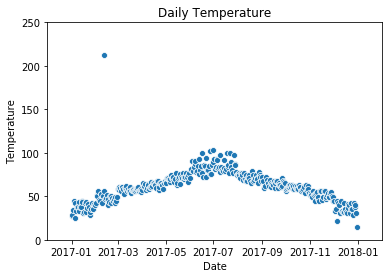

In [85]:
ax = sns.scatterplot(x=df.index,y='Temperature', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,250))
ax.set_title("Daily Temperature")

Text(0.5, 1.0, 'Daily Flyers')

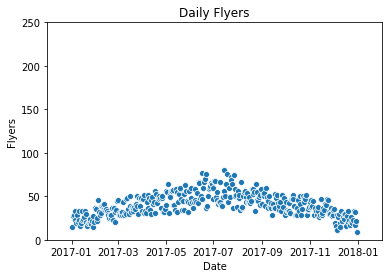

In [86]:
ax = sns.scatterplot(x=df.index,y='Flyers', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,250))
ax.set_title("Daily Flyers")

Text(0.5, 1.0, 'Daily Sales')

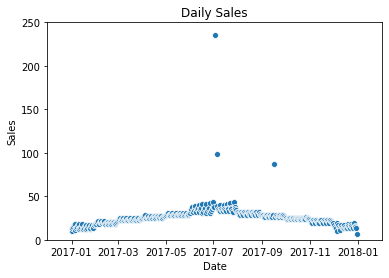

In [87]:
ax = sns.scatterplot(x=df.index,y='Sales', data = df)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,250))
ax.set_title("Daily Sales")

In [88]:
def get_zscore(series):
    zscores = pd.Series((series - series.mean()) / series.std()).rename('z_score')
    results = pd.concat([series, zscores], axis=1)
    return results

## 7.) Use a 2 sigma decision rule to isolate the outliers. Do these make sense? Should certain outliers be kept or removed?

In [113]:
temps = get_zscore(df['Temperature'])
temp_outliers = df.loc[temps['z_score'].abs() > 2]

Text(0.5, 1.0, 'Daily Temperature with Outliers')

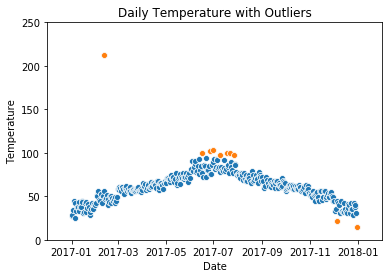

In [115]:
ax_1 = sns.scatterplot(x=df.index,y='Temperature', data = df)
ax = sns.scatterplot(x=temp_outliers.index,y='Temperature', data = temp_outliers)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,250))
ax.set_title("Daily Temperature with Outliers")

In [91]:
flyers = get_zscore(df['Flyers'])
flyers_outliers = df.loc[flyers['z_score'].abs() > 2]

Text(0.5, 1.0, 'Daily Flyers with Outliers')

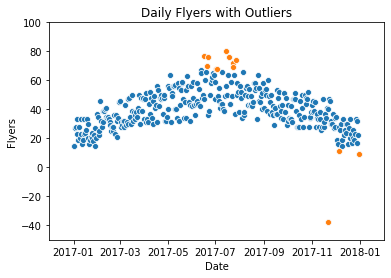

In [92]:
ax_1 = sns.scatterplot(x=df.index,y='Flyers', data = df)
ax = sns.scatterplot(x=flyers_outliers.index,y='Flyers', data = flyers_outliers)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(-50,100))
ax.set_title("Daily Flyers with Outliers")

In [93]:
sales = get_zscore(df['Sales'])
sales_outliers = df.loc[sales['z_score'].abs() > 2]

Text(0.5, 1.0, 'Daily Sales with Outliers')

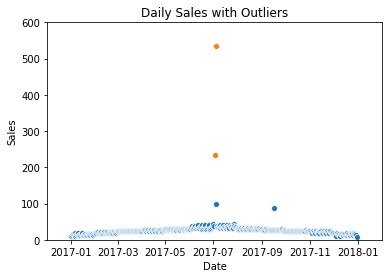

In [107]:
ax_1 = sns.scatterplot(x=df.index,y='Sales', data = df)
ax = sns.scatterplot(x=sales_outliers.index,y='Sales', data = sales_outliers)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,600))
ax.set_title("Daily Sales with Outliers")

## 8.) Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [95]:
temps = get_zscore(df['Temperature'])
temp_outliers = df.loc[temps['z_score'].abs() > 3]

Text(0.5, 1.0, 'Daily Temperature with Outliers')

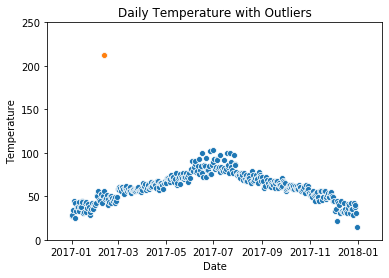

In [96]:
ax_1 = sns.scatterplot(x=df.index,y='Temperature', data = df)
ax = sns.scatterplot(x=temp_outliers.index,y='Temperature', data = temp_outliers)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,250))
ax.set_title("Daily Temperature with Outliers")

In [97]:
flyers = get_zscore(df['Flyers'])
flyers_outliers = df.loc[flyers['z_score'].abs() > 3]

Text(0.5, 1.0, 'Daily Flyers with Outliers')

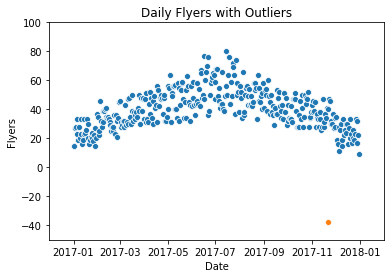

In [98]:
ax_1 = sns.scatterplot(x=df.index,y='Flyers', data = df)
ax = sns.scatterplot(x=flyers_outliers.index,y='Flyers', data = flyers_outliers)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(-50,100))
ax.set_title("Daily Flyers with Outliers")

In [99]:
sales = get_zscore(df['Sales'])
sales_outliers = df.loc[sales['z_score'].abs() > 3]

Text(0.5, 1.0, 'Daily Sales with Outliers')

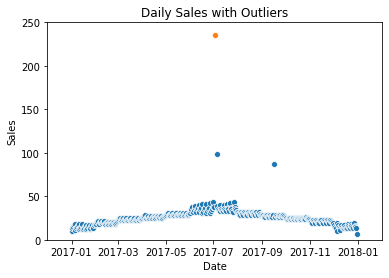

In [100]:
ax_1 = sns.scatterplot(x=df.index,y='Sales', data = df)
ax = sns.scatterplot(x=sales_outliers.index,y='Sales', data = sales_outliers)
ax.set(xlim=('2016-12-01','2018-02-01'),ylim=(0,250))
ax.set_title("Daily Sales with Outliers")